In [ ]:
Netflix: Analysis & Visualization

In [ ]:
#Importing pandas library
import pandas as pd

Dataset Link: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

In [ ]:
#Reading the source .csv file into a pandas dataframe rd (raw data) and displaying 10 rows.
rd = pd.read_csv('/content/sample_data/netflix_titles.csv')
rd.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
#Displaying the dataframe information
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Strip extra spaces from the 'date_added' column.
rd['date_added'] = rd['date_added'].str.strip()

#Standardizing the format of date in 'date_added' field.
rd['date_added'] = pd.to_datetime(rd['date_added'])

In [ ]:
# Filling the missing values in 'rating' field with the value 'Not Rated'.
rd['rating'].fillna('Not Rated', inplace=True)

In [ ]:
#Handling the 'duration' fied and extracting only the numeric part from the string values as 'duration_value' new column.
rd['duration_value'] = rd['duration'].str.extract('(\d+)').astype(float)

# Extracting the unit (min or Season) from the 'duration' field as 'duration_unit' new column.
rd['duration_unit'] = rd['duration'].str.extract('([a-zA-Z]+)')

In [ ]:
#Checking if all entries in 'listed_in' field are strings and then capitalizing the first letter of the entry.
rd['listed_in'] = rd['listed_in'].astype(str).apply(lambda x: x.title())

In [ ]:
# Trimming the 'description' column as needed
rd['description'] = rd['description'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

In [ ]:
# Saving the cleaned DataFrame back to a CSV file
cleaned_file_path = 'cleaned_dataset.csv'  # Replace with your desired file path
rd.to_csv('/content/sample_data/cleaned_dataset.csv', index=False)

In [ ]:
#Reading the cleaned dataset into a pandas dataframe df and displaying 10 rows.
df=pd.read_csv('/content/sample_data/cleaned_dataset.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,2.0,Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"Tv Dramas, Tv Horror, Tv Mysteries",The arrival of a charismatic young priest brin...,1.0,Season
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British Tv Shows, Reality Tv",A talented batch of amateur bakers face off in...,9.0,Seasons
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,min


Q1. Display the distribution of Movies and TV shows on Netflix

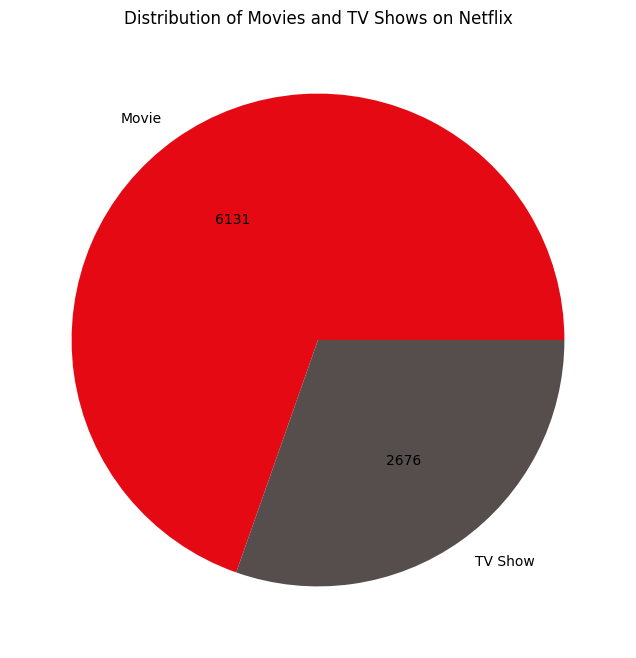

In [ ]:
import matplotlib.pyplot as plt

df_pie = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_pie, labels=df_pie.index, autopct=lambda p: '{:.0f}'.format(p * sum(df_pie) / 100),
        colors=['#E50914', '#564d4d', '#000000', '#831010'])

plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()

Q2. Show the trend of Movies and TV Shows releases across years

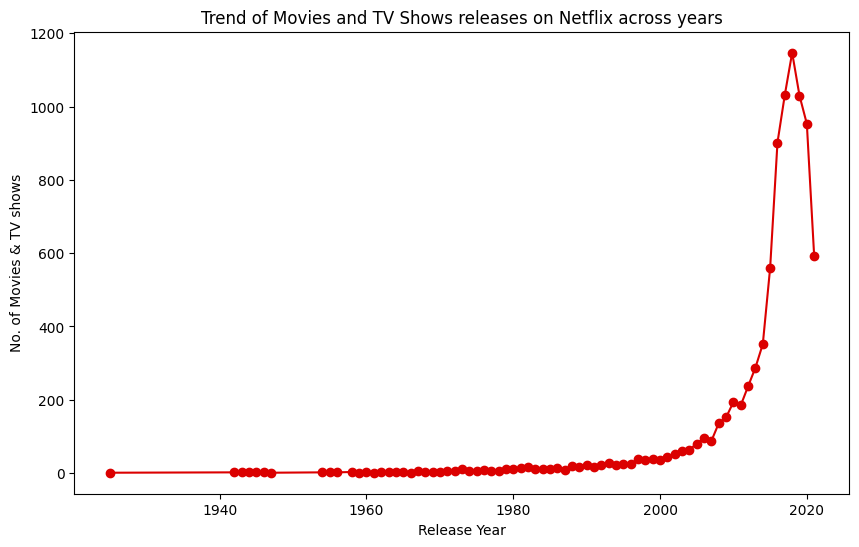

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

release_year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
release_year_counts.plot(kind='line', marker='o', color='#db0000')

plt.title('Trend of Movies and TV Shows releases on Netflix across years')
plt.xlabel('Release Year')
plt.ylabel('No. of Movies & TV shows')

plt.show()

Q3. Display the Top 50 countries with highest production of Movies and TV shows.

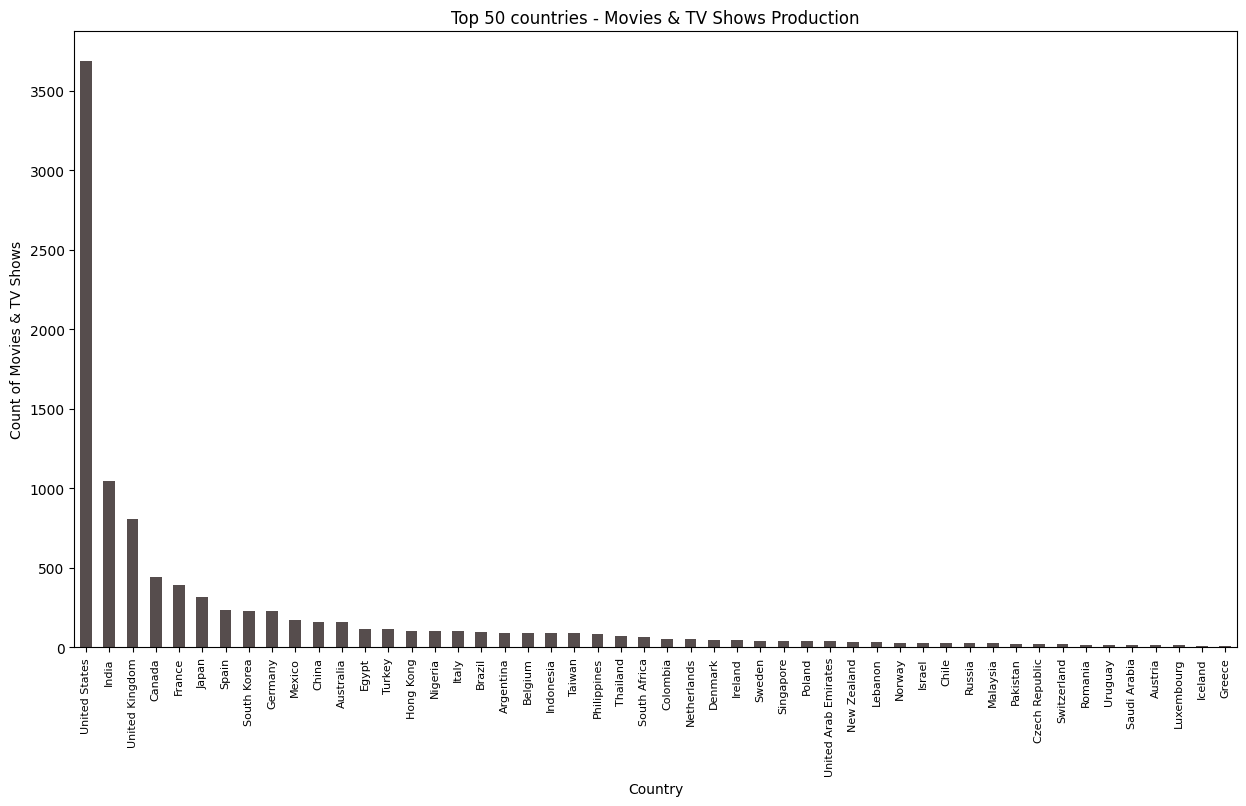

In [ ]:
# Splitting countries and counting the production of each country
country_series = df['country'].dropna().str.split(', ').apply(pd.Series).stack().reset_index(drop=True)
country_counts = country_series.value_counts().iloc[:50]

plt.figure(figsize=(15, 8))
country_counts.plot(kind='bar', color='#564d4d')

plt.title('Top 50 countries - Movies & TV Shows Production')
plt.xlabel('Country')
plt.ylabel('Count of Movies & TV Shows')
plt.xticks(rotation=90, fontsize=8)

plt.show()

Q4. Plot a bar chart with the Ratings data of content on Netflix.

Q5. Plot a histogram of the duration column.


Q6. Calculate and plot the average duration per release year.

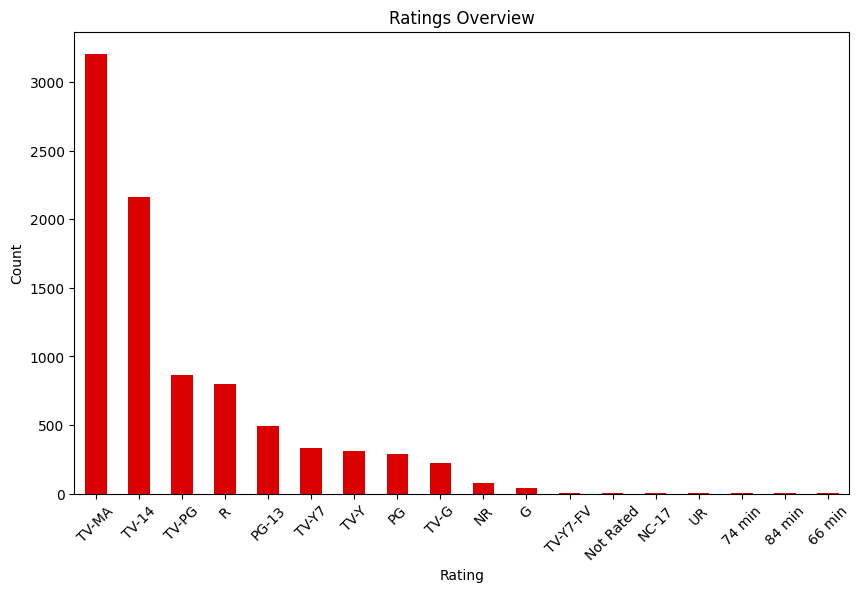

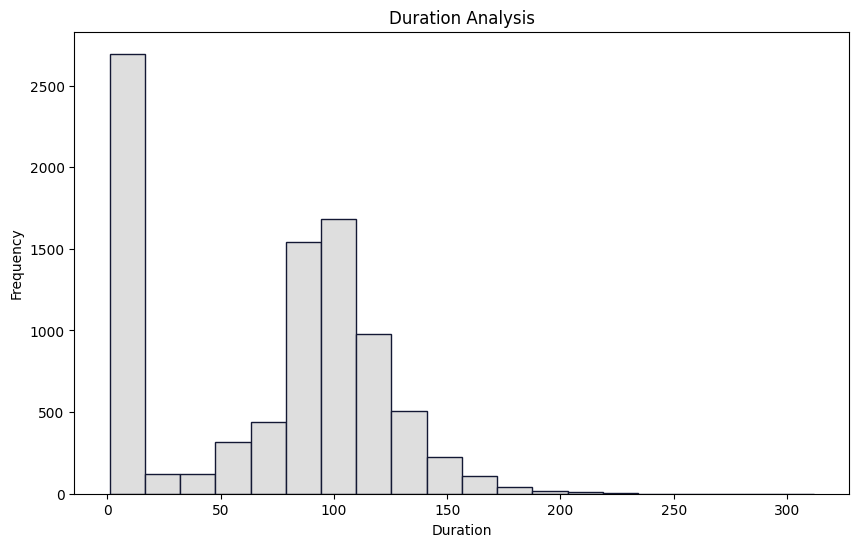

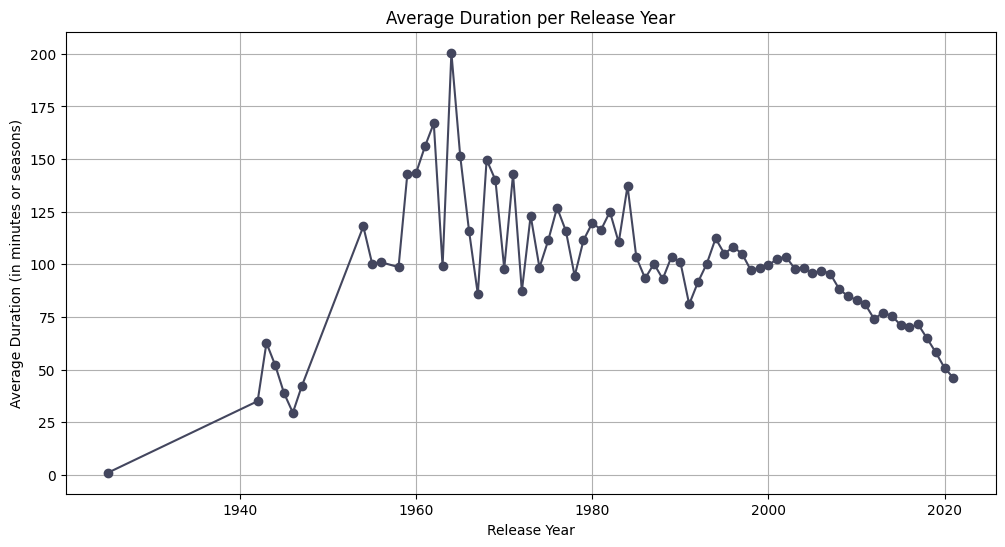

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   date_added  release_year rating   duration  \
0  2021-09-25          2020  PG-13     90 min   
1  2021-09-24          2021  TV-MA  2 Seasons   
2  2021-09-24          2021  TV-MA   1 Season   
3  2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Q4. Function to plot a bar chart with the Ratings data of content on Netflix.
def plot_ratings_bar_chart(df):
    ratings = df['rating'].fillna('Not Rated').value_counts()
    plt.figure(figsize=(10, 6))
    ratings.plot(kind='bar', color='#db0000')
    plt.title('Ratings Overview')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#Extracting the numeric value from the 'duration' column and adding it as a new column called 'duration_numeric'.
def extract_duration(df):
    df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)
    if (df['duration_numeric'] < 0).any():
        print("Warning: Negative values found in duration.")
    return df

#Q5. Plot a histogram of the duration using the new duration_numeric column.
def plot_duration_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['duration_numeric'].dropna(), bins=20, color = '#dedede', edgecolor='#131834')
    plt.ylim(bottom=0)
    plt.title('Duration Analysis')
    plt.xlabel('Duration')
    plt.ylabel('Frequency')
    plt.show()

#Q6. Calculate and plot the average duration per release year.
def calculate_avg_duration_per_year(df):
    avg_duration = df.groupby('release_year')['duration_numeric'].mean()
    plt.figure(figsize=(12, 6))
    avg_duration.plot(kind='line', marker='o', color='#43465e')
    plt.title('Average Duration per Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Duration (in minutes or seasons)')
    plt.grid(True)
    plt.show()

    #Adding the calculated average duration per year as a new column.
    df = df.join(avg_duration, on='release_year', rsuffix='_avg')
    return df

#Main function to read the cleaned dataset created initially and call the functions to display the charts.
def main():
    df = pd.read_csv('/content/sample_data/cleaned_dataset.csv')

    #Process DataFrame
    df = extract_duration(df)

    #Plotting the charts
    plot_ratings_bar_chart(df)
    plot_duration_histogram(df)
    df = calculate_avg_duration_per_year(df)

    #Displaying the data to check the new columns added.
    print(df.head())

if __name__ == "__main__":
    main()